# Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utiles.eliminacion import EliminadorMCAR, EliminadorMAR, EliminadorMNAR
from typing import Callable, List, Tuple

In [2]:
maxi = 30

In [11]:
def plot(conj: pd.DataFrame):
    plt.scatter(conj['X'], conj['Y'], s=6)
    # plt.scatter([0, 0, maxi, maxi], [0, maxi, 0, maxi], s=10, c='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(-0.5, maxi+0.5)
    plt.ylim(-0.5, maxi+0.5)


In [4]:
variacion = 0.3
conjunto = pd.DataFrame()

arr = np.arange(maxi, dtype=float)

x = np.zeros((maxi * maxi, ), dtype=float)
y = np.zeros((maxi * maxi, ), dtype=float)
for i in range(maxi):
    x[i*maxi:(i+1)*maxi] += arr
    y[i*maxi:(i+1)*maxi] += i

cte = 0.5 - variacion / 2
conjunto['X'] = cte + x + np.random.random((maxi * maxi, )) * variacion
conjunto['Y'] = cte + y + np.random.random((maxi * maxi, )) * variacion


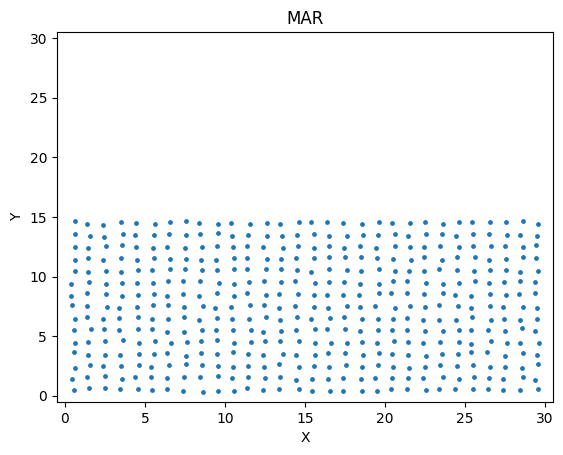

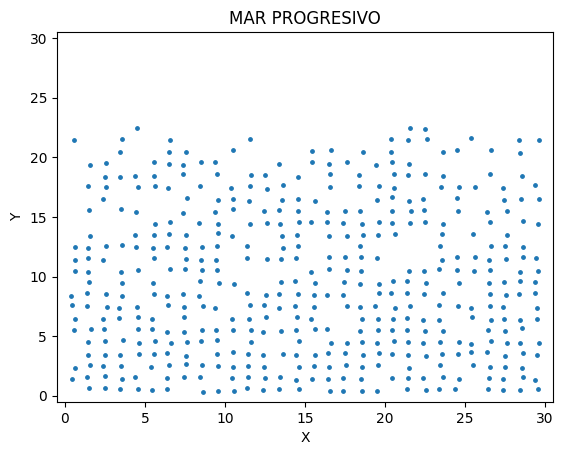

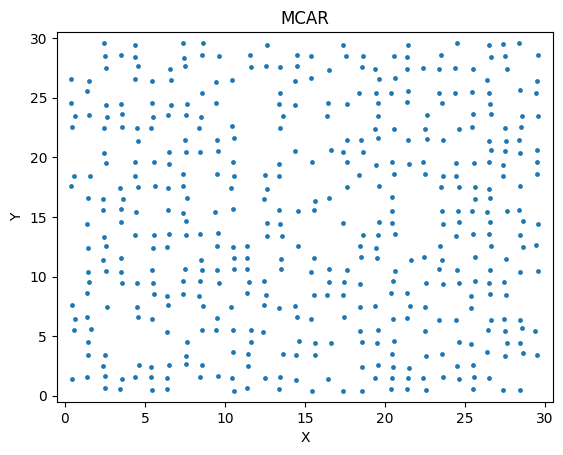

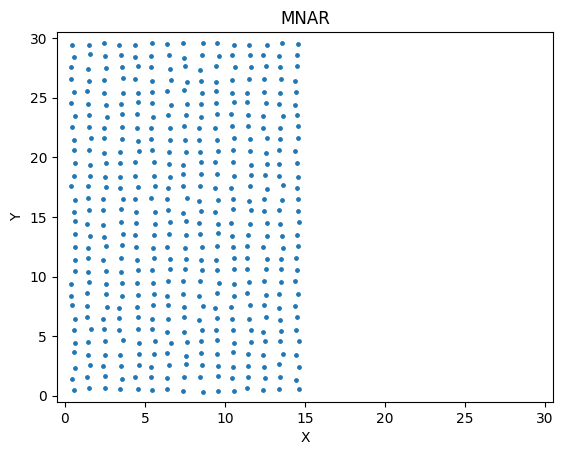

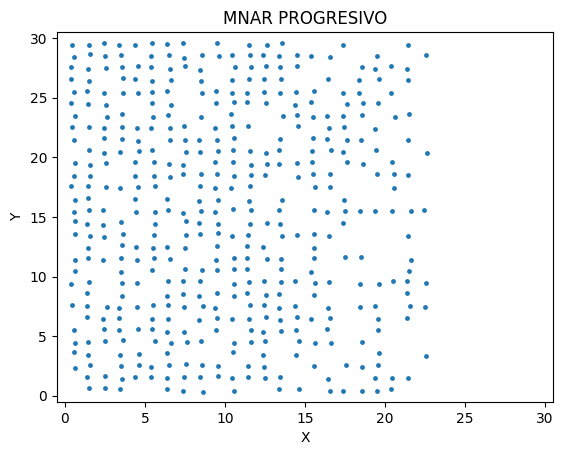

In [14]:

ext = 'svg' # png
save = True

atr = 'X'
cond = 'Y'
p = 0.5
ausencias: List[Tuple[str, Callable]] = [
    ('mar', EliminadorMAR(atr, cond)),
    ('mar_progresivo', EliminadorMAR(atr, cond, marProgresivo=2)),
    ('mcar', EliminadorMCAR(atr)),
    ('mnar', EliminadorMNAR(atr)),
    ('mnar_progresivo', EliminadorMNAR(atr, progresivo=2)),
]


for nombre, eliminar in ausencias:
    titulo = nombre.replace('_', ' ').upper()
    plot(eliminar(conjunto.copy(), 0.5))
    plt.title(titulo)
    if save:
        nombre = f'./resultados/tipos/missing_{nombre}.{ext}'
        plt.savefig(nombre, format=ext, dpi=400, bbox_inches='tight')

    plt.show()


## Media, mediana y moda

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List, Tuple
import seaborn as sns

In [3]:
def plot(array: pd.Series):
    
    sns.kdeplot(array)
    #sns.histplot(array, )

    mean = array.mean()
    median = array.median()
    mode = array.round(1).mode()[0]
    vals = [mean, median, mode]
    print(vals)

    for v, nv, c in zip(vals, ['media', 'mediana', 'moda'], ['red', 'green', 'purple']):
        plt.vlines(v, [0], [0.35], c, label=nv)
    plt.ylabel('')


[5.9835510333642725, 6.660977591466159, 8.0]
[5.012857600126228, 5.017744338763929, 5.1]


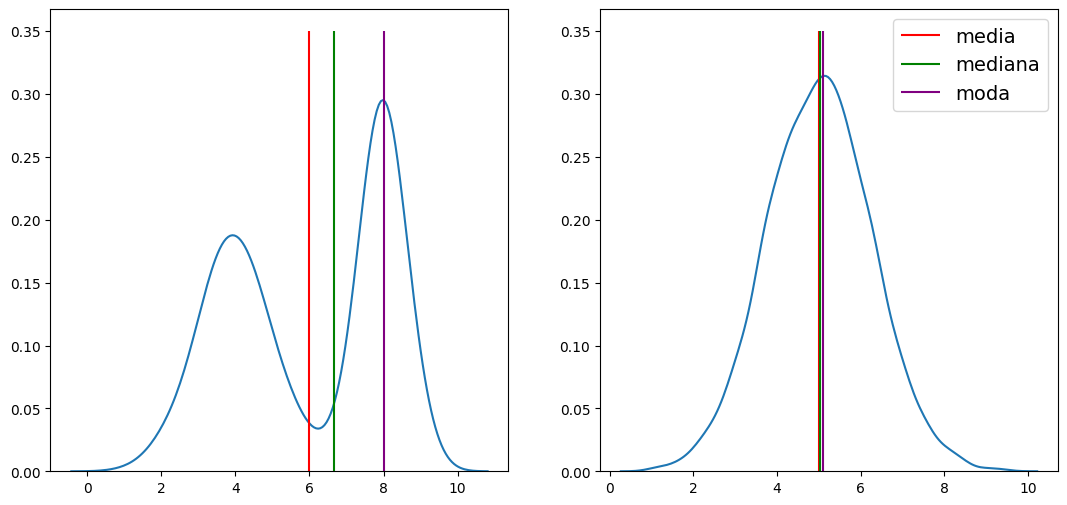

In [5]:
n = 1000
['#1e64fa', '#fa641e']

# array = np.random.random(n)
a = pd.Series(np.random.normal(0, 0.5, n))
b = pd.Series(np.random.normal(5, 1.25, n * 4))



array = pd.concat([a + 3, 2 * a - 1]) + 5


figs = (1, 2)
img, _ = plt.subplots(*figs, figsize=(13, 6))
plt.subplot(*figs, 1)
plot(array)
plt.subplot(*figs, 2)
plot(b)
plt.legend(fontsize=14)
plt.savefig('./resultados/bimodal_valores_centrales.svg', format='svg', dpi=400, bbox_inches='tight')
plt.show()


In [40]:
array.round(2).mode()

0    2.95
1    3.11
dtype: float64

In [59]:
array.std()

2.1541822766968988

In [53]:
df = pd.read_csv('./eeg-eye-state.csv')

In [65]:
df['V6'].median(), df['V6'].mean()

(4617.95, 4644.02237917223)

In [66]:
df['V6'].quantile(0.45), df['V6'].quantile(0.55)


(4616.92, 4618.97)

In [89]:
orden = array.sort_values().to_numpy()
(orden[1:] - orden[:len(orden)-1]).mean()

0.004469805131089059

In [91]:
grupo = 0.0045 * 5
(array / grupo).round().mode() * grupo

0    3.015
dtype: float64

In [86]:
orden = df['V6'].sort_values().to_numpy()
(orden[1:] - orden[:len(orden)-1]).mean()

24.02001401962748

In [92]:
grupo = 24 * 5
(df['V6'] / grupo).round().mode() * grupo

0    4560.0
Name: V6, dtype: float64

https://stackoverflow.com/questions/31248913/how-to-estimate-density-function-and-calculate-its-peaks

## Runge

In [118]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [120]:
puntosx = np.array(range(-10, 11, 2)) / 10
x = np.arange(2001) / 1000 - 1

In [121]:
def runge(x: float) -> float:
    return 1 / (1 + 25 * x * x)

puntosy = runge(puntosx)
rungey = runge(x.copy())

In [128]:

def poli(x, _grado: int = 10):
    modelo = make_pipeline(
        PolynomialFeatures(_grado),
        LinearRegression())

    modelo.fit(puntosx.reshape(-1, 1), puntosy)
    print(modelo)
    return modelo.predict(x)

poliy = poli(x.reshape(-1, 1))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])


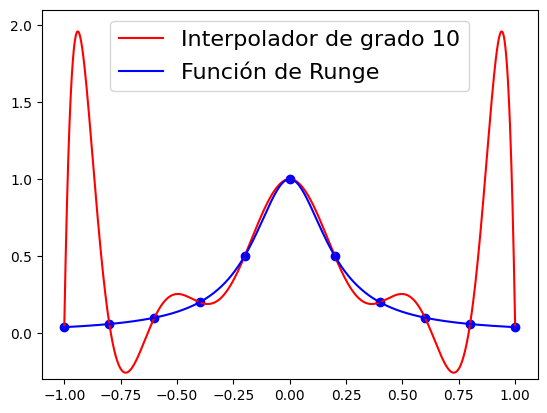

In [143]:
plt.plot(x, poliy, label='Interpolador de grado 10', c='red')
plt.plot(x, rungey, label='Función de Runge', c='blue')
plt.scatter(puntosx, puntosy, c='blue')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.3, 2.1])
plt.legend(fontsize=16)
plt.savefig(
    './resultados/fenomeno_runge.svg', format='svg', dpi=400, bbox_inches='tight')
plt.show()

## Cuarteto de anscombe

In [6]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

In [7]:

cuarteto = pd.read_csv(StringIO('''x1, y1, x2, y2, x3, y3, x4, y4
10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58
8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76
13.0, 7.58, 13.0, 8.74, 13.0, 12.74, 8.0, 7.71
9.0, 8.81, 9.0, 8.77, 9.0, 7.11, 8.0, 8.84
11.0, 8.33, 11.0, 9.26, 11.0, 7.81, 8.0, 8.47
14.0, 9.96, 14.0, 8.10, 14.0, 8.84, 8.0, 7.04
6.0, 7.24, 6.0, 6.13, 6.0, 6.08, 8.0, 5.25
4.0, 4.26, 4.0, 3.10, 4.0, 5.39, 19.0, 12.50
12.0, 10.84, 12.0, 9.13, 12.0, 8.15, 8.0, 5.56
7.0, 4.82, 7.0, 7.26, 7.0, 6.42, 8.0, 7.91
5.0, 5.68, 5.0, 4.74, 5.0, 5.73, 8.0, 6.89
'''), sep=', ', engine='python')

In [8]:
# recta: y=3+0.5x
x = np.arange(20000) / 1000
y = x * 0.5 + 3

In [9]:
cuarteto

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


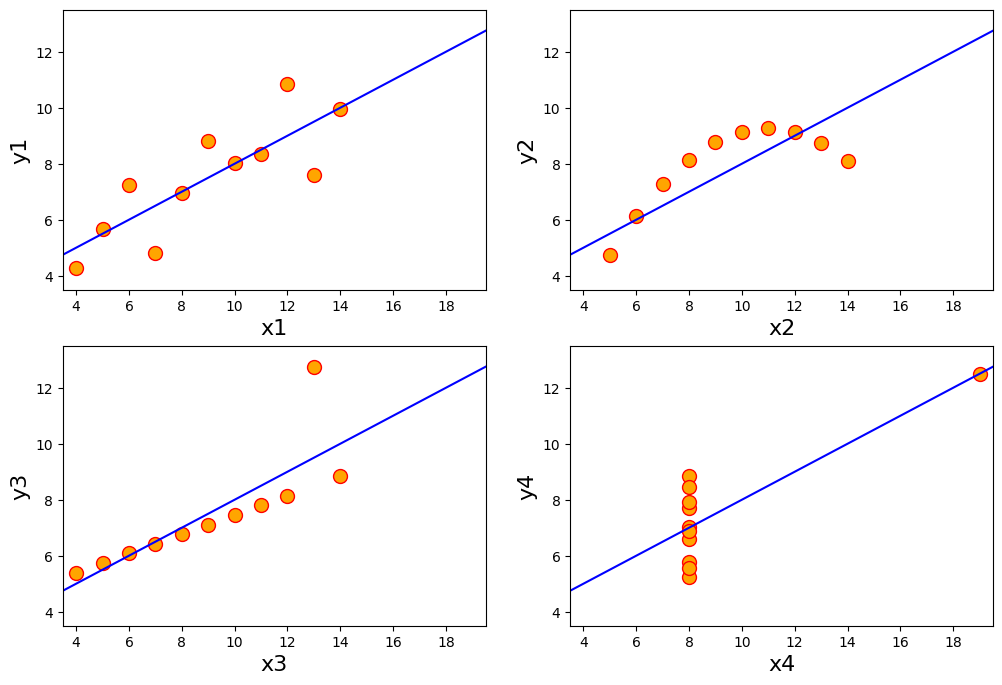

In [11]:

img, _ = plt.subplots(2, 2, figsize=(12, 8))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.scatter(
        cuarteto[f'x{i}'], cuarteto[f'y{i}'],
        c='orange', edgecolor='red', s=100)
    plt.plot(x, y, c='blue')
    plt.xlabel(f'x{i}', fontsize=16)
    plt.ylabel(f'y{i}', fontsize=16)
    plt.xlim([3.5, 19.5])
    plt.ylim([3.5, 13.5])

plt.savefig(
    './resultados/cuarteto_anscombe.svg', format='svg',
    dpi=400, bbox_inches='tight')
plt.show()

## Heterocedasticidad

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [48]:
x = np.arange(0, 10.05, 0.1)
rand = np.random.random(x.shape)
c = (0.5-(x * 10 % 2)) * 2
d = x - 3
y = (c * d * 2 - c * x + rand * x * 20 * c) / 140

In [49]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
linex = np.array([-10, 20])
liney = model.predict(linex.reshape(-1, 1))

[]

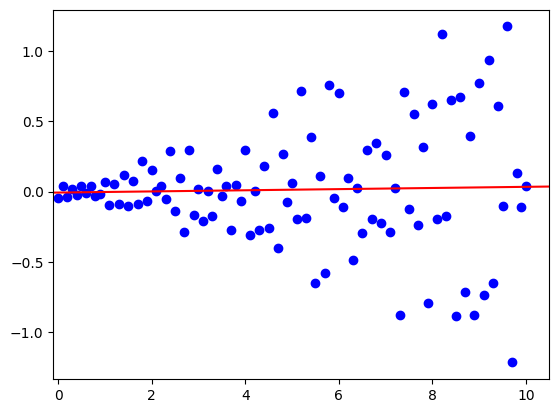

In [50]:
plt.scatter(x, y, c='blue')
plt.plot(linex, liney, c='red')
plt.xlim([-0.1, 10.5])
plt.savefig(
    './resultados/heterocedasticidad.svg', format='svg',
    dpi=400, bbox_inches='tight')
plt.plot()

TEMP

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
dataset = pd.read_csv('./eeg-eye-state.csv')

In [4]:
var = 'V6'
atr = dataset[var]
n = 7000

In [5]:

eliminables = pd.Series(dataset.index < n).sample(frac=1).reset_index(drop=True)

# Poner Nan en esas filas
dataset[var] = atr.mask(eliminables, pd.NA)
atr = dataset[var]
nans = atr.isna()

In [6]:
# Calculo de la función de densidad
density = gaussian_kde(atr[~nans])

In [16]:
xs = atr[(~nans) & (atr > 3000)]
y = density(xs)

In [17]:
xs.shape

(7979,)

In [18]:
y.shape

(7979,)

In [19]:
# xs = np.linspace(atr.quantile(0.03), atr.quantile(0.97), 100)
moda = xs.iloc[np.argmax(y)]

In [20]:
moda

4617.44

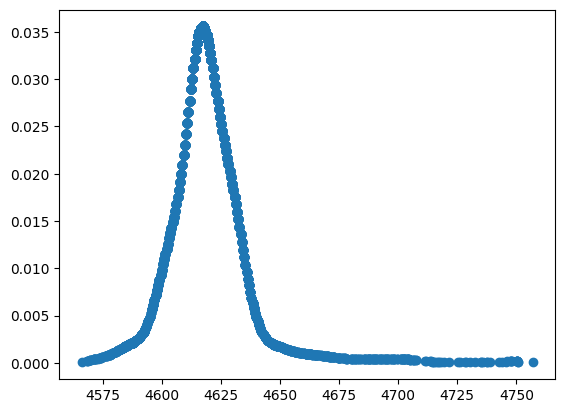

In [22]:
plt.scatter(xs, y)
plt.show()